In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,make_scorer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
google_app_data = pd.read_csv(r'''C:\Users\Akshay\Desktop\MIS\First_Sem\Data_Sci_Eng_Mthd\Assignment3\googleplaystore.csv''',encoding="ISO-8859-1")
google_app_user_review = pd.read_csv(r'''C:\Users\Akshay\Desktop\MIS\First_Sem\Data_Sci_Eng_Mthd\Assignment3\googleplaystore_user_reviews.csv''',encoding="ISO-8859-1")

In [4]:
google_app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
google_app_data.drop(google_app_data.loc[google_app_data['Type'] == "0"].index, inplace=True, axis=0)
google_app_data.drop(google_app_data.loc[google_app_data['Installs'] == "0"].index, axis=0, inplace=True)
google_app_data.drop(google_app_data.loc[google_app_data['Rating'].isna()].index, axis=0, inplace=True)
google_app_data.drop(google_app_data.loc[google_app_data['Size'] == "Varies with device"].index, axis=0, inplace=True)
google_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7729 entries, 0 to 10840
Data columns (total 13 columns):
App               7729 non-null object
Category          7729 non-null object
Rating            7729 non-null float64
Reviews           7729 non-null object
Size              7729 non-null object
Installs          7729 non-null object
Type              7729 non-null object
Price             7729 non-null object
Content Rating    7729 non-null object
Genres            7729 non-null object
Last Updated      7729 non-null object
Current Ver       7725 non-null object
Android Ver       7727 non-null object
dtypes: float64(1), object(12)
memory usage: 845.4+ KB


In [6]:
google_app_data['Size'] = google_app_data['Size'].apply(lambda x:float(x.replace("M", ""))*1024 if "M" in x else float(x.replace("k","")))
google_app_data['Reviews'] = google_app_data['Reviews'].astype(float)
google_app_data.reset_index(drop=True, inplace=True)
google_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 13 columns):
App               7729 non-null object
Category          7729 non-null object
Rating            7729 non-null float64
Reviews           7729 non-null float64
Size              7729 non-null float64
Installs          7729 non-null object
Type              7729 non-null object
Price             7729 non-null object
Content Rating    7729 non-null object
Genres            7729 non-null object
Last Updated      7729 non-null object
Current Ver       7725 non-null object
Android Ver       7727 non-null object
dtypes: float64(3), object(10)
memory usage: 785.1+ KB


In [7]:
values = {'Rating': 0.0, 'Type': 'Free', 'Content Rating': 'Unrated','Price':'0.0'}
google_app_data.fillna(value=values, inplace=True)
google_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 13 columns):
App               7729 non-null object
Category          7729 non-null object
Rating            7729 non-null float64
Reviews           7729 non-null float64
Size              7729 non-null float64
Installs          7729 non-null object
Type              7729 non-null object
Price             7729 non-null object
Content Rating    7729 non-null object
Genres            7729 non-null object
Last Updated      7729 non-null object
Current Ver       7725 non-null object
Android Ver       7727 non-null object
dtypes: float64(3), object(10)
memory usage: 785.1+ KB


In [8]:
def price_quality(temp):
    if temp == "0":
        return 0
    else:
        temp = temp[1:]
        temp = float(temp)
        return temp
    
    
google_app_data['Price'] = google_app_data['Price'].map(price_quality).astype(float)  
google_app_data.drop_duplicates(subset='App', keep='first', inplace=True)

In [9]:
google_app_data.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver','Installs'], axis=1, inplace=True)
google_app_data_with_categories = pd.DataFrame(pd.get_dummies(google_app_data))
google_app_data_with_categories.info()
google_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7029 entries, 0 to 7728
Columns: 156 entries, Rating to Genres_Word
dtypes: float64(4), uint8(152)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7029 entries, 0 to 7728
Data columns (total 8 columns):
Category          7029 non-null object
Rating            7029 non-null float64
Reviews           7029 non-null float64
Size              7029 non-null float64
Type              7029 non-null object
Price             7029 non-null float64
Content Rating    7029 non-null object
Genres            7029 non-null object
dtypes: float64(4), object(4)
memory usage: 494.2+ KB


In [10]:
categories_data = google_app_data['Category'].value_counts().reset_index()
categories_data.head()
plt.figure(figsize=(10,10))
pie_plot = plt.subplot(1,1,1)
plt.pie(x=categories_data['Category'], labels=categories_data['index'], autopct='%1.1f%%')
plt.legend()
pie_plot.legend(bbox_to_anchor=(1.4,1))
plt.show()

C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


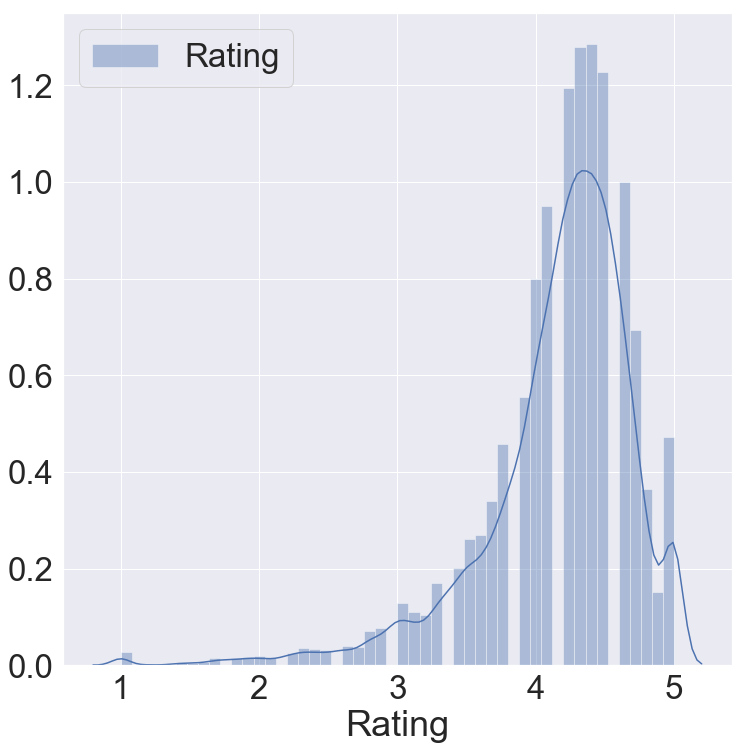

C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


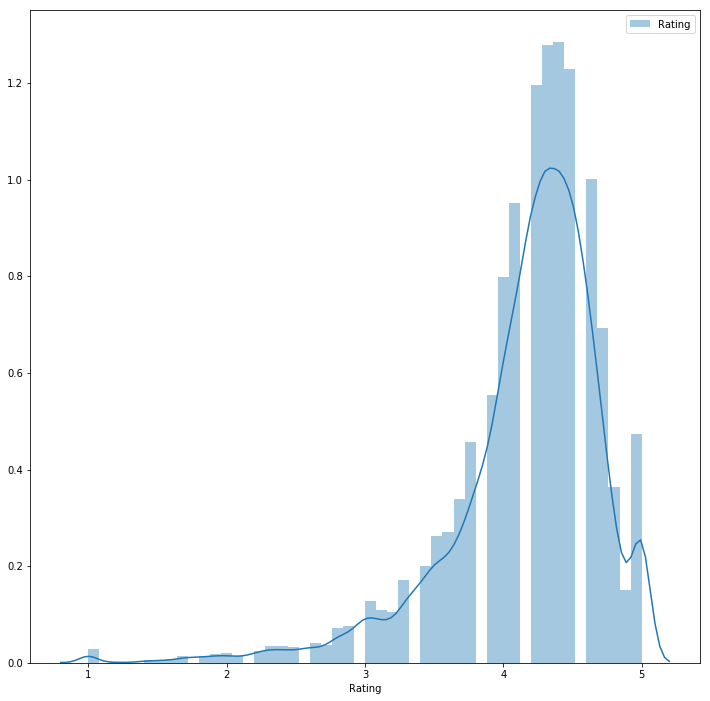

In [11]:
plt.figure(figsize=(12,12))
sns.distplot(google_app_data['Rating'])
plt.legend(['Rating'])
plt.show()

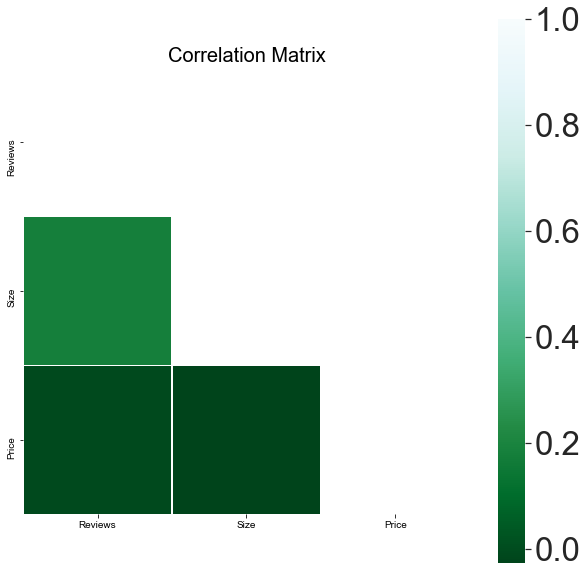

In [12]:
full_data = google_app_data.drop(columns=['Rating','Category', 'Genres', 'Content Rating','Type'])
mask = np.zeros_like(full_data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(10,10))
plt.title('Correlation Matrix',fontsize=20)
sns.set(font_scale=3)
sns.heatmap(full_data.corr(),linewidths=0.25,vmax=1.0,square=True,cmap="BuGn_r",mask=mask,linecolor='w',cbar={"shrink":.75})

C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


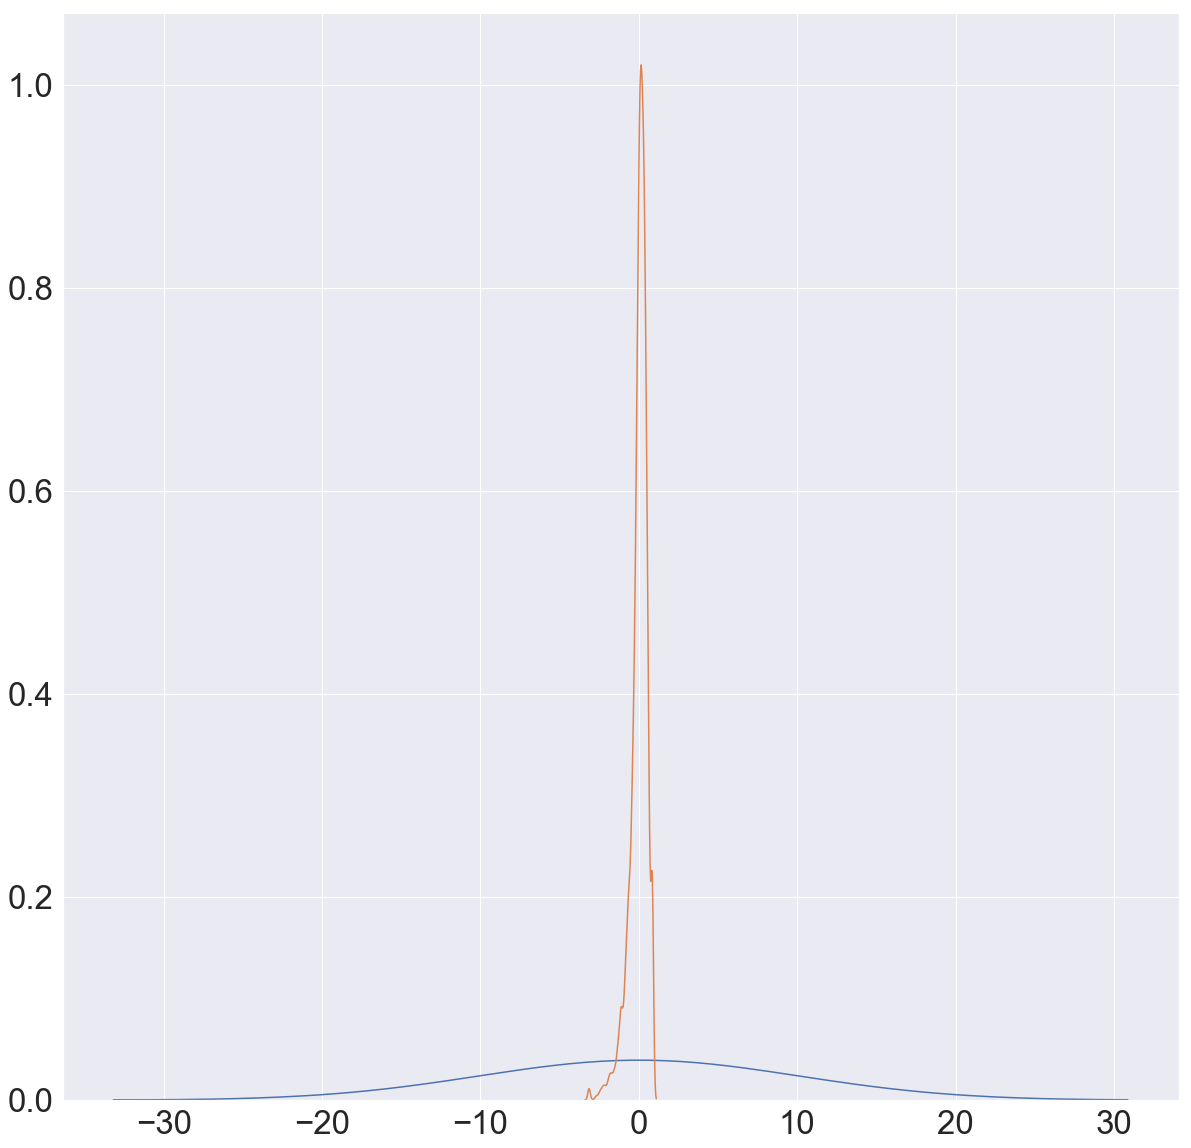

In [13]:
model_temp_data = google_app_data.drop(columns=['Category', 'Genres', 'Content Rating','Type'])
plt.figure(figsize=(20,20))

lm_review = smf.ols(formula="Rating ~ Reviews+Size+Price", data=model_temp_data).fit()
review_elem = pd.concat([model_temp_data, pd.Series(lm_review.resid, name='resid'), pd.Series(lm_review.predict(), name="predict")], axis=1)
sns.kdeplot(np.array(review_elem.resid), bw=10)
sns.distplot(np.array(review_elem.resid), hist=False)

# lm_size = smf.ols(formula="Rating ~ Size", data=model_temp_data).fit()
# size_elem = pd.concat([model_temp_data, pd.Series(lm_size.resid, name='resid'), pd.Series(lm_size.predict(), name="predict")], axis=1)
# plt.subplot(2,2,2)
# sns.kdeplot(np.array(size_elem.resid), bw=10)
# sns.distplot(np.array(size_elem.resid), hist=False)
# 
# lm_price = smf.ols(formula="Rating ~ Price", data=model_temp_data).fit()
# price_elem = pd.concat([model_temp_data, pd.Series(lm_price.resid, name='resid'), pd.Series(lm_price.predict(), name="predict")], axis=1)
# plt.subplot(2,2,3)
# sns.kdeplot(np.array(price_elem.resid), bw=10)
# sns.distplot(np.array(price_elem.resid), hist=False)

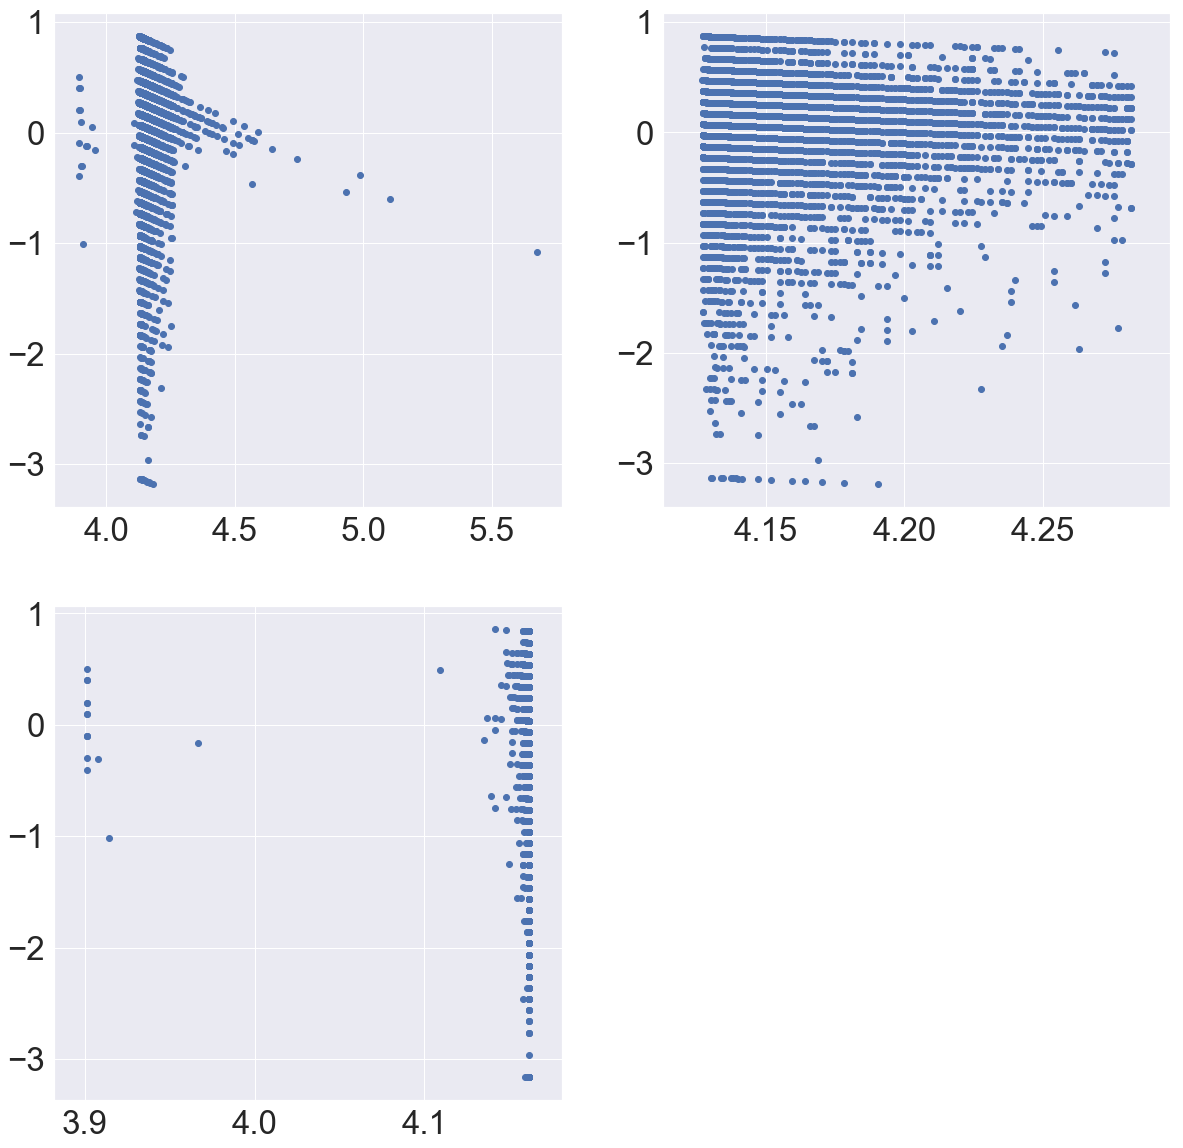

In [14]:
plt.figure(figsize=(20, 20))


def plot_heter(subp, f, temp_data,lab):
    plt.subplot(2, 2, subp)
    lm = smf.ols(formula=f, data=temp_data).fit()
    resid = lm.resid
    plt.scatter(lm.predict(), resid, label=lab)


plot_heter(1, "Rating ~ Reviews + Size + Price", model_temp_data, "Review")    
plot_heter(2, "Rating ~ Size", model_temp_data, "Size")
plot_heter(3, "Rating ~ Price", model_temp_data, "Price")

In [15]:
plt.figure(figsize=(20,20))


def liner_fun(subp, x, temp_data, lab):
    plt.subplot(2, 2, subp)
    plt.scatter(x, temp_data.Rating, color='blue', label=lab, alpha = 0.5)
    #plt.plot(model_temp_data.Reviews,model_temp_data.Rating,color='Red',label='Linear Line',alpha = 0.5)
    plt.xlabel(lab,fontsize=5)
    plt.ylabel("Rating",fontsize=5)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    plt.legend()


liner_fun(1, model_temp_data.Reviews, model_temp_data, "Review")
liner_fun(2, model_temp_data.Size, model_temp_data, "Size")
liner_fun(3, model_temp_data.Price, model_temp_data, "Price")

C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


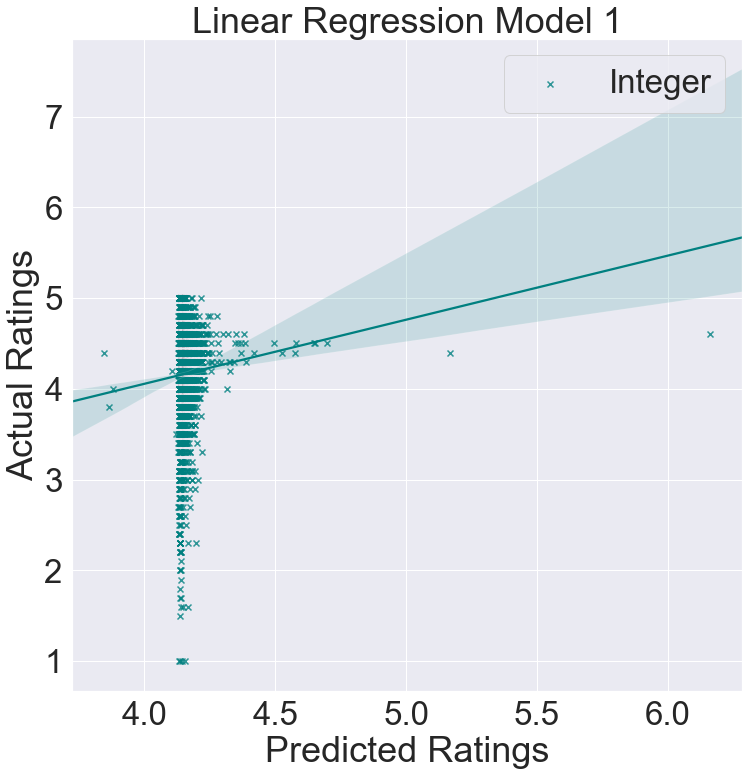

C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


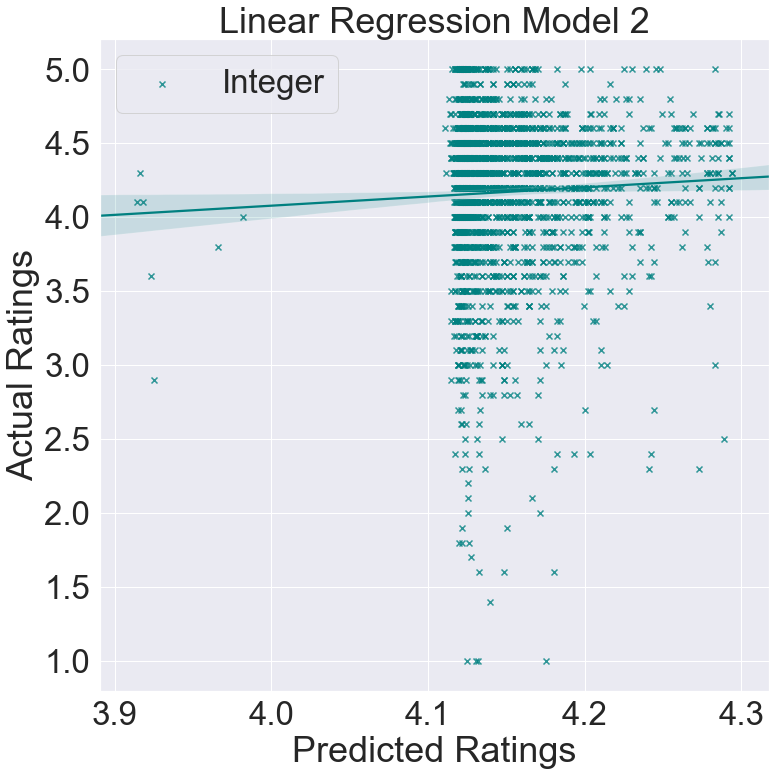

C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


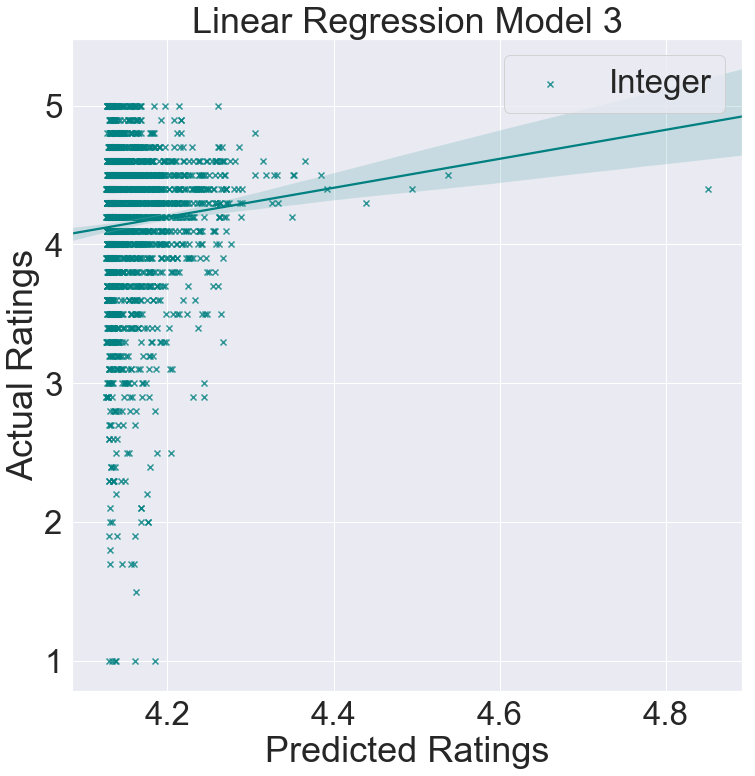

C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


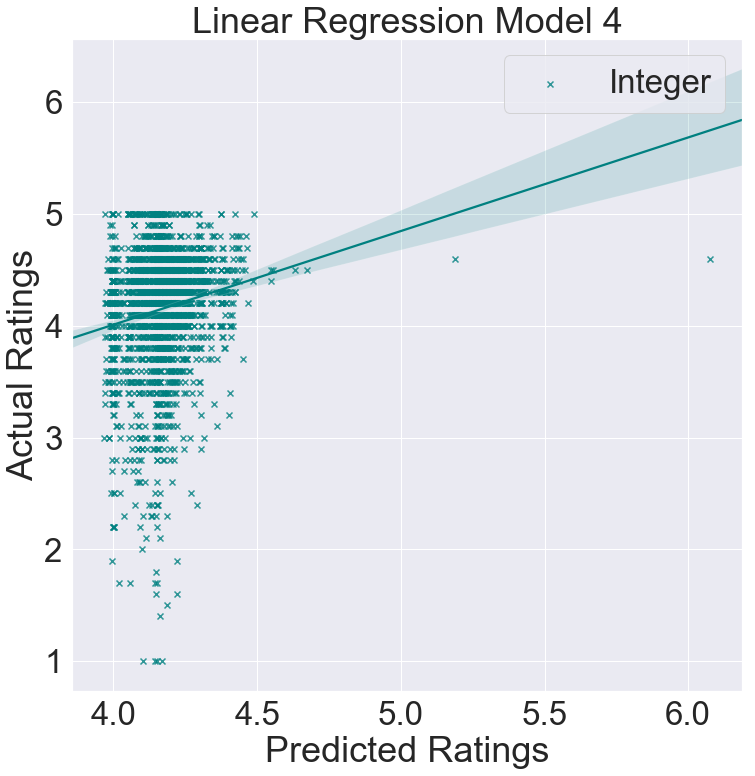

C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


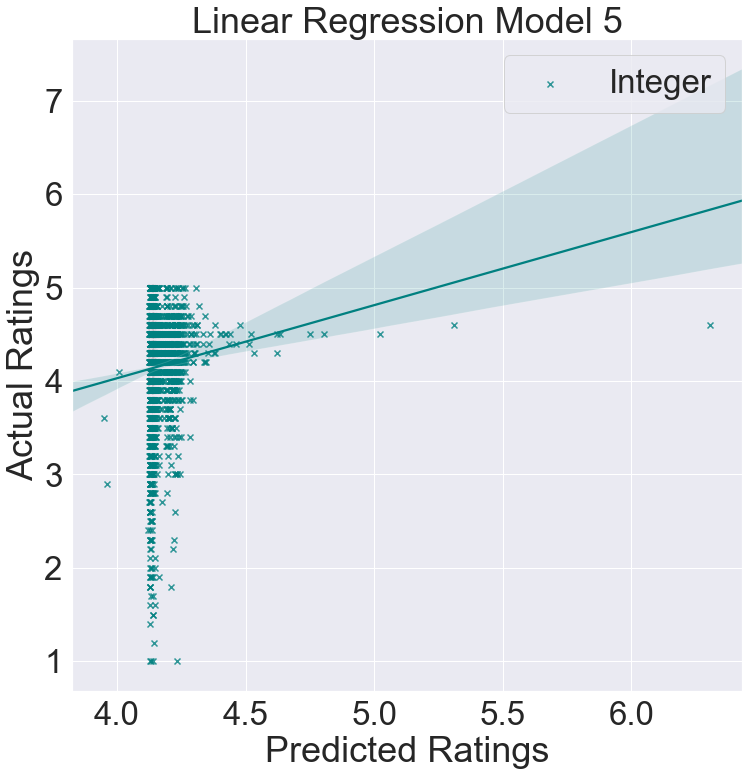

In [16]:
score_values = []
model_summary = []


def model_generate(columns_drop, title,contain_dummies):
    model_data = google_app_data.drop(columns=columns_drop)
    if contain_dummies:
        model_data = pd.DataFrame(pd.get_dummies(model_data))    
    Y1 = google_app_data.Rating
        
    x1_train, x1_test, y1_train, y1_test = train_test_split(model_data, Y1, test_size=0.3)
    linear_model1 = LinearRegression()
    linear_model1.fit(x1_train, y1_train)
    result = linear_model1.predict(x1_test)
    
    score1 = cross_val_score(linear_model1, model_data, Y1, scoring=make_scorer(mean_squared_error))
    score_values.append(score1)
    
    model1_ols = sm.OLS(Y1, model_data[model_data.columns])
    model1_metrics = model1_ols.fit()
    model_summary.append(model1_metrics)
    
    plt.figure(figsize=(12, 12))
    sns.regplot(result, y1_test, color='teal', label='Integer', marker='x')
    plt.legend()
    plt.title(title)
    plt.xlabel('Predicted Ratings')
    plt.ylabel('Actual Ratings')
    plt.show()
    
    
model_generate(['Rating','Category', 'Genres', 'Content Rating', 'Type'], "Linear Regression Model 1", False)
model_generate(['Rating','Category', 'Genres', 'Content Rating', 'Type', 'Reviews'], "Linear Regression Model 2", False)
model_generate(['Rating','Category', 'Genres', 'Content Rating', 'Type', 'Price'], "Linear Regression Model 3", False)
model_generate(['Rating','Genres', 'Price'], "Linear Regression Model 4", True)
model_generate(['Rating','Category','Genres'],"Linear Regression Model 5", True)

In [22]:
print("Mean squared error\n ")
for x in score_values:
    print(x)
print("\n \n Model Summary is mention below: \n") 
k =1
for y in model_summary:
    print("Linear Regression Model:", k)
    print(y.summary())
    k += 1
    print("\n\n")





Mean squared error
 
[0.18979724 0.39506729 0.38048945]
[0.17997684 0.3951622  0.38195119]
[0.19001464 0.39407483 0.3803696 ]
[0.20768429 0.39461682 0.37851884]
[0.19468061 0.40653324 0.37986708]

 
 Model Summary is mention below: 

Linear Regression Model: 1
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     2161.
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:01:28   Log-Likelihood:                -17761.
No. Observations:                7029   AIC:                         3.553e+04
Df Residuals:                    7026   BIC:                         3.555e+04
Df Model:                           3                                         
Covariance Type:            

In [349]:
model_temp_data = google_app_data.drop(columns=['Category', 'Genres', 'Content Rating','Type'])
model_temp_data['Review_Price'] = model_temp_data.Reviews * model_temp_data.Price
model_temp_data['Review_Size']  = model_temp_data.Reviews * model_temp_data.Size
model_temp_data.head()
Y_temp = model_temp_data.Rating
model_temp_data.drop(columns=['Rating'], inplace=True)

interation_model = LinearRegression()
interation_model.fit(model_temp_data, Y_temp)

interaction_score = cross_val_score(interation_model, model_temp_data, Y_temp,scoring=make_scorer(mean_squared_error))
print("Mean Squared Error: ", interaction_score)
print("---------------------------------------------------------------")

inter_model = sm.OLS(Y_temp,model_temp_data)
inter_metrics = inter_model.fit()
print(inter_metrics.summary())

[0.18568005 0.39638778 0.37969291]
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     1344.
Date:                Sat, 17 Nov 2018   Prob (F-statistic):               0.00
Time:                        23:49:20   Log-Likelihood:                -17699.
No. Observations:                7029   AIC:                         3.541e+04
Df Residuals:                    7024   BIC:                         3.544e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Reviews      

C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
